<a href="https://colab.research.google.com/github/fatihadr/Project-Data-Analyst/blob/main/sentiment_analysis_traveloka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRARY INSTALLATION & IMPORT LIBRARY**

In [ ]:
!pip install Sastrawi
!pip install vaderSentiment
!pip install wordcloud

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

# **LOAD DATA**

In [ ]:
df = pd.read_csv('/content/Traveloka_reviews_v2.csv')
df

,username,feedback,score,at,app_version
0,Jarwi Siregar,"Layanan memuaskan, fitur lengkap.",4,2024-07-26 7:38:36,4.1.0
1,"Dr. Sarah Hasanah, M.Kom.",Udah nyoba berkali-kali tetep gk bisa.,2,2024-04-14 14:06:19,4.1.0
2,"Harsanto Susanti, S.IP",Udah nyoba berkali-kali tetep gk bisa.,2,2024-05-20 17:32:47,4.1.0
3,dr. Rachel Budiman,"Payah, gk bisa dipake sama sekali.",2,2024-09-28 10:43:45,4.1.0
4,Usyi Wijayanti,"Gak bisa checkout, tolong perbaiki dong!",3,2024-06-04 14:45:08,4.1.0
...,...,...,...,...,...
1995,"KH. Mustika Handayani, S.E.I","Pokoknya juara, the best dah.",4,2024-02-05 6:12:15,4.1.0
1996,Tgk. Olga Budiman,"App-nya keren, mantul!",5,2024-10-23 15:30:44,4.1.0
1997,"Drs. Wulan Hariyah, S.Gz","Cepat dan responsif, saya suka.",5,2024-07-31 2:36:43,4.1.0
1998,"Darman Pranowo, S.Gz","Mantap, semuanya lancar.",4,2024-04-18 18:02:03,4.1.0


# **DATA WRANGLING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   username     2000 non-null   object
 1   feedback     1950 non-null   object
 2   score        2000 non-null   int64 
 3   at           2000 non-null   object
 4   app_version  2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,score
count,2000.000000
mean,2.967500
std,1.392269
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
df.isnull().sum()

,0
username,0
feedback,50
score,0
at,0
app_version,0


In [ ]:
df.duplicated().sum()

0

# **DATA CLEANSING & PREPROCESSING**

In [ ]:
# Menghapus nilai null
df = df.dropna().reset_index(drop=True)

In [ ]:
df.isnull().sum()

,0
username,0
feedback,0
score,0
at,0
app_version,0


In [ ]:
# Melakukan pengecekan data duplikat yang ada pada kolom 'feedback'
df[df.duplicated(['feedback'])]

,username,feedback,score,at,app_version
2,"Harsanto Susanti, S.IP",Udah nyoba berkali-kali tetep gk bisa.,2,2024-05-20 17:32:47,4.1.0
6,Dt. Cemani Laksita,"Gagal terus, tolong dong diperbaiki!",1,2024-07-10 6:20:53,4.1.0
8,"Zulfa Hidayanto, M.Ak","Gak bisa checkout, tolong perbaiki dong!",1,2024-02-21 7:00:01,4.1.0
10,Ir. Calista Saefullah,"Gagal terus, tolong dong diperbaiki!",1,2024-07-10 6:57:23,4.1.0
12,Anggabaya Prasetya,"Layanan memuaskan, fitur lengkap.",5,2024-10-09 19:52:12,4.1.0
...,...,...,...,...,...
1945,"KH. Mustika Handayani, S.E.I","Pokoknya juara, the best dah.",4,2024-02-05 6:12:15,4.1.0
1946,Tgk. Olga Budiman,"App-nya keren, mantul!",5,2024-10-23 15:30:44,4.1.0
1947,"Drs. Wulan Hariyah, S.Gz","Cepat dan responsif, saya suka.",5,2024-07-31 2:36:43,4.1.0
1948,"Darman Pranowo, S.Gz","Mantap, semuanya lancar.",4,2024-04-18 18:02:03,4.1.0


In [ ]:
# Check unique value of 'feedback'
df['feedback'].nunique()

20

In [ ]:
# Menampilkan nilai/data unique pada kolom 'feedback'
df['feedback'].unique()

array(['Layanan memuaskan, fitur lengkap.',
       'Udah nyoba berkali-kali tetep gk bisa.',
       'Payah, gk bisa dipake sama sekali.',
       'Gak bisa checkout, tolong perbaiki dong!',
       'Gagal terus, tolong dong diperbaiki!',
       'Aplikasinya suka ngelag parah', 'Sering eror, ga recommended.',
       'Cepat dan responsif, saya suka.',
       'Lancar jaya bro, gk ada error.',
       'Aduh app-nya error mulu, ga bener.',
       'Sipp, gk ada masalah, mantap.', 'Mantap, semuanya lancar.',
       'Pokoknya juara, the best dah.',
       'Mantul, pokoknya aplikasi ini juara deh!',
       'Lemot bgt app ini, fix uninstall.',
       'App ini mantap betul, gk kecewa.', 'Aplikasinya bagus banget!',
       'Lambat banget! ga enak dipake',
       'Males banget, tiap buka loading terus.', 'App-nya keren, mantul!'],
      dtype=object)

In [ ]:
# Membuat dataset copy agar dataset asli tidak berubah
df_copy = df.copy()

In [ ]:
# Manipulasi data dengan mengubah text menjadi lower case
df_copy['feedback'] = df_copy['feedback'].str.lower()
df_copy['feedback']

,feedback
0,"layanan memuaskan, fitur lengkap."
1,udah nyoba berkali-kali tetep gk bisa.
2,udah nyoba berkali-kali tetep gk bisa.
3,"payah, gk bisa dipake sama sekali."
4,"gak bisa checkout, tolong perbaiki dong!"
...,...
1945,"pokoknya juara, the best dah."
1946,"app-nya keren, mantul!"
1947,"cepat dan responsif, saya suka."
1948,"mantap, semuanya lancar."


In [ ]:
# Mengecek text yang memiliki angka didalamnya
df_copy['feedback'].str.contains('\d').sum()

0

In [ ]:
# Menghapus karakter yang tidak dibutuhkan (tanda baca)
df_copy['feedback'] = df_copy['feedback'].str.replace('[^\w\s]', '', regex=True)
df_copy['feedback']

,feedback
0,layanan memuaskan fitur lengkap
1,udah nyoba berkalikali tetep gk bisa
2,udah nyoba berkalikali tetep gk bisa
3,payah gk bisa dipake sama sekali
4,gak bisa checkout tolong perbaiki dong
...,...
1945,pokoknya juara the best dah
1946,appnya keren mantul
1947,cepat dan responsif saya suka
1948,mantap semuanya lancar


Mengecek typo dan kata tidak baku


In [ ]:
# Melihat nilai/data unique pada kolom 'feedback'
df['feedback'].unique()

array(['Layanan memuaskan, fitur lengkap.',
       'Udah nyoba berkali-kali tetep gk bisa.',
       'Payah, gk bisa dipake sama sekali.',
       'Gak bisa checkout, tolong perbaiki dong!',
       'Gagal terus, tolong dong diperbaiki!',
       'Aplikasinya suka ngelag parah', 'Sering eror, ga recommended.',
       'Cepat dan responsif, saya suka.',
       'Lancar jaya bro, gk ada error.',
       'Aduh app-nya error mulu, ga bener.',
       'Sipp, gk ada masalah, mantap.', 'Mantap, semuanya lancar.',
       'Pokoknya juara, the best dah.',
       'Mantul, pokoknya aplikasi ini juara deh!',
       'Lemot bgt app ini, fix uninstall.',
       'App ini mantap betul, gk kecewa.', 'Aplikasinya bagus banget!',
       'Lambat banget! ga enak dipake',
       'Males banget, tiap buka loading terus.', 'App-nya keren, mantul!'],
      dtype=object)

In [ ]:
# Mengganti kata tidak baku menjadi kata baku
import re
Replace_text = {
    "udah": "sudah",
    "tetep": "tetap",
    "gk": "tidak",
    "error": "eror",
    "ga": "tidak",
    "best" : "baik",
    "mantul": "mantap",
    "lemot" :"lambat",
    "recommended" :"rekomendasi",
    "bgt" : "banget",
    'nyoba': 'coba',
    'gak' : 'tidak'
  }
# Fungsi untuk mengganti kata sesuai Replace_text
def replace(str_text):
    for word, replacement in Replace_text.items():
        str_text = re.sub(r'\b' + re.escape(word) + r'\b', replacement, str_text)
    return str_text


df_copy['feedback'] = df_copy['feedback'].apply(lambda x : replace(x))
df_copy['feedback']

,feedback
0,layanan memuaskan fitur lengkap
1,sudah coba berkalikali tetap tidak bisa
2,sudah coba berkalikali tetap tidak bisa
3,payah tidak bisa dipake sama sekali
4,tidak bisa checkout tolong perbaiki dong
...,...
1945,pokoknya juara the baik dah
1946,appnya keren mantap
1947,cepat dan responsif saya suka
1948,mantap semuanya lancar


Menghapus stopwords

In [ ]:
# instalasi modul
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Menghapus Stopwords
add_drop_text =['dong','app-nya', 'app', 'mulu','bro','dah','deh']
stop_words = stopwords.words('indonesian') + stopwords.words('english') + add_drop_text
df_copy['feedback'] = df_copy['feedback'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_copy['feedback']

,feedback
0,layanan memuaskan fitur lengkap
1,coba berkalikali
2,coba berkalikali
3,payah dipake
4,checkout tolong perbaiki
...,...
1945,pokoknya juara
1946,appnya keren mantap
1947,cepat responsif suka
1948,mantap lancar


# **Stemming/Lemmatization**

In [ ]:
stemmer = StemmerFactory().create_stemmer()
df_copy['feedback'] = df_copy['feedback'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
df_copy['feedback']

,feedback
0,layan muas fitur lengkap
1,coba berkalikali
2,coba berkalikali
3,payah dipake
4,checkout tolong baik
...,...
1945,pokok juara
1946,appnya keren mantap
1947,cepat responsif suka
1948,mantap lancar


In [ ]:
df_copy['feedback'].unique()

array(['layan muas fitur lengkap', 'coba berkalikali', 'payah dipake',
       'checkout tolong baik', 'gagal tolong baik',
       'aplikasi suka ngelag parah', 'eror rekomendasi',
       'cepat responsif suka', 'lancar jaya eror',
       'aduh appnya eror bener', 'sipp mantap', 'mantap lancar',
       'pokok juara', 'mantap pokok aplikasi juara',
       'lambat banget fix uninstall', 'mantap kecewa',
       'aplikasi bagus banget', 'lambat banget enak dipake',
       'males banget buka loading', 'appnya keren mantap'], dtype=object)

# **Permodelan dengan menggunakan nilai duplicate kolom 'feedback' -> df1**

In [ ]:
df1 = df_copy.copy()

In [ ]:
# Menghitung frekuensi kemunculan setiap kata
freq = pd.Series(' '.join(df1['feedback']).split()).value_counts()
head_freq=freq.head(20)
head_freq

,count
banget,431
mantap,379
eror,299
aplikasi,280
tolong,269
baik,269
dipake,260
lambat,240
appnya,196
suka,193


In [ ]:
# histrogram
fig = px.histogram(head_freq, x=head_freq.index, y=head_freq.values)
fig.update_layout(
    title="Total frekuensi kata",
    xaxis_title="Kata",
    yaxis_title="Jumlah kata"
)
fig.show()

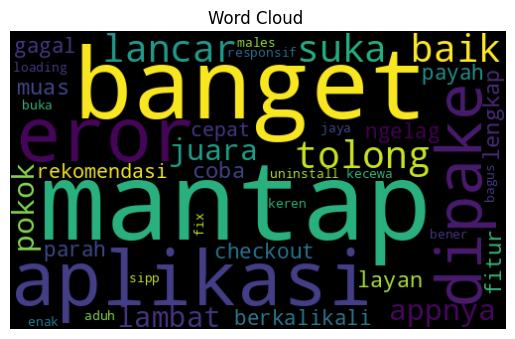

In [ ]:
all_words = ' '.join([i for i in df2['feedback']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud ')
plt.show()

# **Sentiment Analysis**

In [ ]:
analyzer = SentimentIntensityAnalyzer()

additional = {
     'kecewa': -0.4,
    'rugi': -1,
    'buruk': -0.6,
    'jelek': -0.6,
    'lelet': -0.7,
    'gagal': -0.5,
    'parah': -0.6,
    'mahal': -0.3,
    'tolong': -0.1,
    'hilang': -0.3,
    'gajelas': -0.3,
    'gj': -0.3,
    'promo': 0.6,
    'kadang': -0.1,
    'maling': -0.5,
    'ganggu': 0.3,
    'sedot': -0.5,
    'bagus': 0.5,
    'pulsa': -5,
    'potong': -1,
    'baik': 0.5,
    'kntl': -1,
    'ngelag': -0.8,
    'salah': -0.5,
    'bintang': 3,
    'benerin': -0.4,
    'lambat': -0.8,
    'siput': -0.4,
    'mati': -0.7,
    'minimal': -0.3,
    'susah': -0.6,
    'nagih': -0.6,
    'capek': -0.7,
    'kacau': -0.3,
    'tagih': -0.3,
    'mantap': 1,
    'puas': 0.9,
    'sampah': -0.5,
    'sulit': -0.6,
    'aneh': -0.4,
}


analyzer.lexicon.update(additional)

df1['Sentiment'] =df1['feedback'].apply(lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else ('Negatif' if analyzer.polarity_scores(x)['compound'] < 0 else 'Netral'))

df1

,username,feedback,score,at,app_version,Sentiment
0,Jarwi Siregar,layan muas fitur lengkap,4,2024-07-26 7:38:36,4.1.0,Netral
1,"Dr. Sarah Hasanah, M.Kom.",coba berkalikali,2,2024-04-14 14:06:19,4.1.0,Netral
2,"Harsanto Susanti, S.IP",coba berkalikali,2,2024-05-20 17:32:47,4.1.0,Netral
3,dr. Rachel Budiman,payah dipake,2,2024-09-28 10:43:45,4.1.0,Netral
4,Usyi Wijayanti,checkout tolong baik,3,2024-06-04 14:45:08,4.1.0,Positif
...,...,...,...,...,...,...
1945,"KH. Mustika Handayani, S.E.I",pokok juara,4,2024-02-05 6:12:15,4.1.0,Netral
1946,Tgk. Olga Budiman,appnya keren mantap,5,2024-10-23 15:30:44,4.1.0,Positif
1947,"Drs. Wulan Hariyah, S.Gz",cepat responsif suka,5,2024-07-31 2:36:43,4.1.0,Netral
1948,"Darman Pranowo, S.Gz",mantap lancar,4,2024-04-18 18:02:03,4.1.0,Positif


# **Visualisasi**

In [ ]:
# Distribusi label sentiment
temp = df1.groupby('Sentiment').count()['feedback'].reset_index().sort_values(by='feedback',ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,Sentiment,feedback
1,Netral,865
2,Positif,605
0,Negatif,480


<Axes: xlabel='Sentiment', ylabel='count'>

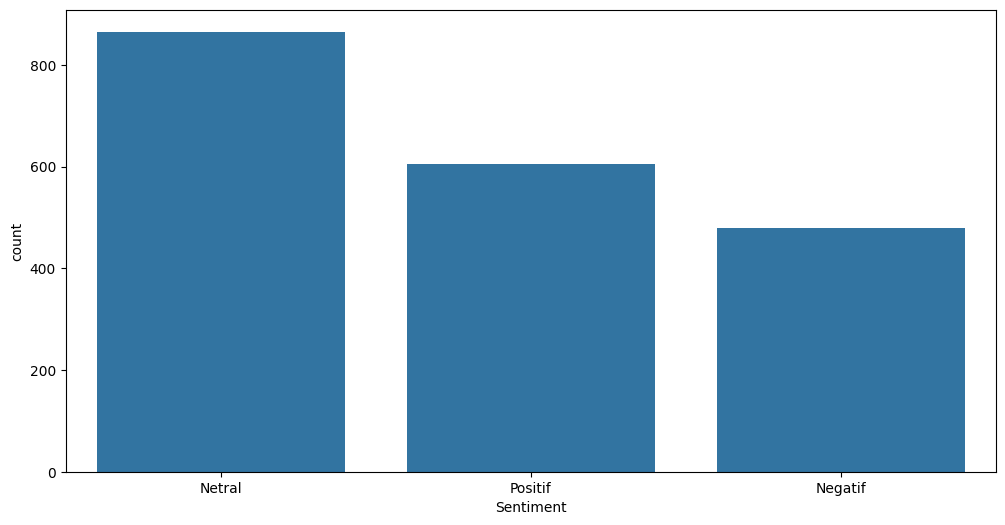

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df1)

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.feedback,
    title = {"position": "top center", "text": "Funnel-Chart dari Distribusi target"}
    ))
fig.show()

# **Vektorisasi**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df1['feedback'])
X_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.48374634, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
df1

,username,feedback,score,at,app_version,Sentiment
0,Jarwi Siregar,layan muas fitur lengkap,4,2024-07-26 7:38:36,4.1.0,Netral
1,"Dr. Sarah Hasanah, M.Kom.",coba berkalikali,2,2024-04-14 14:06:19,4.1.0,Netral
2,"Harsanto Susanti, S.IP",coba berkalikali,2,2024-05-20 17:32:47,4.1.0,Netral
3,dr. Rachel Budiman,payah dipake,2,2024-09-28 10:43:45,4.1.0,Netral
4,Usyi Wijayanti,checkout tolong baik,3,2024-06-04 14:45:08,4.1.0,Positif
...,...,...,...,...,...,...
1945,"KH. Mustika Handayani, S.E.I",pokok juara,4,2024-02-05 6:12:15,4.1.0,Netral
1946,Tgk. Olga Budiman,appnya keren mantap,5,2024-10-23 15:30:44,4.1.0,Positif
1947,"Drs. Wulan Hariyah, S.Gz",cepat responsif suka,5,2024-07-31 2:36:43,4.1.0,Netral
1948,"Darman Pranowo, S.Gz",mantap lancar,4,2024-04-18 18:02:03,4.1.0,Positif


# DATA MODELLING

In [ ]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df1['Sentiment'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1560, 40), (390, 40))

In [ ]:
# menampilkan total dari netral, positif, dan negatif dari data train
y_train.value_counts()

,count
Sentiment,
Netral,700
Positif,475
Negatif,385


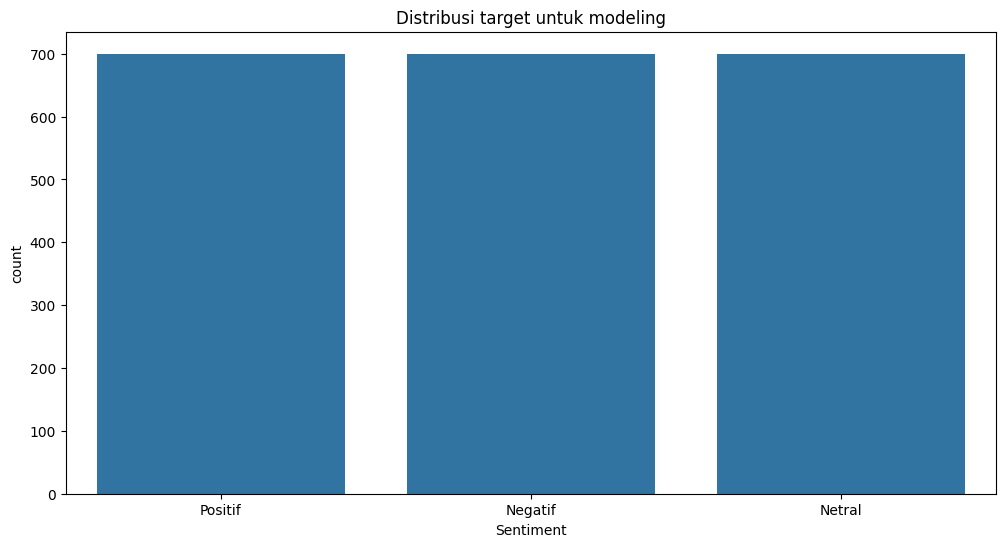

In [ ]:
# Resampling target agar data target seimbang

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi target untuk modeling')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# init parameters (tuning agar model semakin bagus)
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [ ]:
# evaluasi model
from sklearn.metrics import classification_report

y_pred_rf = rf_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       1.00      1.00      1.00        95
      Netral       1.00      1.00      1.00       165
     Positif       1.00      1.00      1.00       130

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390



In [ ]:
# Mengambil input teks dari pengguna
new_text = input("Masukkan teks untuk prediksi sentimen: ")

# Mengubah teks menjadi bentuk numerik
transformed_text = tfidf_vectorizer.transform([new_text])

# Melakukan prediksi menggunakan model
prediction = rf_model.best_estimator_.predict(transformed_text)

# Menampilkan hasil prediksi
print(f"Teks: {new_text}\nPrediksi Sentimen: {prediction}")

Masukkan teks untuk prediksi sentimen: mantap
Teks: mantap
Prediksi Sentimen: ['Positif']


# **Permodelan dengan menggunakan nilai duplicate yang sudah di hapus pada kolom 'feedback' -> df2**

In [ ]:
df2 = df1.copy().reset_index(drop=True)
df2

,username,feedback,score,at,app_version,Sentiment
0,Jarwi Siregar,layan muas fitur lengkap,4,2024-07-26 7:38:36,4.1.0,Netral
1,"Dr. Sarah Hasanah, M.Kom.",coba berkalikali,2,2024-04-14 14:06:19,4.1.0,Netral
2,"Harsanto Susanti, S.IP",coba berkalikali,2,2024-05-20 17:32:47,4.1.0,Netral
3,dr. Rachel Budiman,payah dipake,2,2024-09-28 10:43:45,4.1.0,Netral
4,Usyi Wijayanti,checkout tolong baik,3,2024-06-04 14:45:08,4.1.0,Positif
...,...,...,...,...,...,...
1945,"KH. Mustika Handayani, S.E.I",pokok juara,4,2024-02-05 6:12:15,4.1.0,Netral
1946,Tgk. Olga Budiman,appnya keren mantap,5,2024-10-23 15:30:44,4.1.0,Positif
1947,"Drs. Wulan Hariyah, S.Gz",cepat responsif suka,5,2024-07-31 2:36:43,4.1.0,Netral
1948,"Darman Pranowo, S.Gz",mantap lancar,4,2024-04-18 18:02:03,4.1.0,Positif


In [ ]:
df2['feedback'].unique()

array(['layan muas fitur lengkap', 'coba berkalikali', 'payah dipake',
       'checkout tolong baik', 'gagal tolong baik',
       'aplikasi suka ngelag parah', 'eror rekomendasi',
       'cepat responsif suka', 'lancar jaya eror',
       'aduh appnya eror bener', 'sipp mantap', 'mantap lancar',
       'pokok juara', 'mantap pokok aplikasi juara',
       'lambat banget fix uninstall', 'mantap kecewa',
       'aplikasi bagus banget', 'lambat banget enak dipake',
       'males banget buka loading', 'appnya keren mantap'], dtype=object)

In [ ]:
# menghapus data duplicate yang ada pada kolom 'feedback'
df2 = df2.drop_duplicates(subset='feedback').reset_index(drop=True)
df2

,username,feedback,score,at,app_version,Sentiment
0,Jarwi Siregar,layan muas fitur lengkap,4,2024-07-26 7:38:36,4.1.0,Netral
1,"Dr. Sarah Hasanah, M.Kom.",coba berkalikali,2,2024-04-14 14:06:19,4.1.0,Netral
2,dr. Rachel Budiman,payah dipake,2,2024-09-28 10:43:45,4.1.0,Netral
3,Usyi Wijayanti,checkout tolong baik,3,2024-06-04 14:45:08,4.1.0,Positif
4,Lili Suryono,gagal tolong baik,2,2024-04-14 22:09:00,4.1.0,Negatif
5,Prayitna Suryono,aplikasi suka ngelag parah,2,2024-09-20 6:57:49,4.1.0,Negatif
6,Winda Sirait,eror rekomendasi,1,2024-09-16 7:04:42,4.1.0,Netral
7,"R.M. Kadir Susanti, S.Ked",cepat responsif suka,5,2024-09-19 10:04:43,4.1.0,Netral
8,Violet Wijaya,lancar jaya eror,4,2024-01-15 14:44:25,4.1.0,Netral
9,Alika Salahudin,aduh appnya eror bener,1,2024-09-09 8:00:59,4.1.0,Netral


In [ ]:
# Menghitung frekuensi kemunculan setiap kata
freq2 = pd.Series(' '.join(df2['feedback']).split()).value_counts()
head_freq2=freq2.head(20)
head_freq2

,count
mantap,5
banget,4
eror,3
aplikasi,3
lancar,2
pokok,2
juara,2
lambat,2
dipake,2
tolong,2


In [ ]:
# Membuat histrogram
fig2 = px.histogram(head_freq2, x=head_freq2.index, y=head_freq2.values)
fig2.update_layout(
    title="Total frekuensi kata",
    xaxis_title="Kata",
    yaxis_title="Jumlah kata"
)
fig2.show()

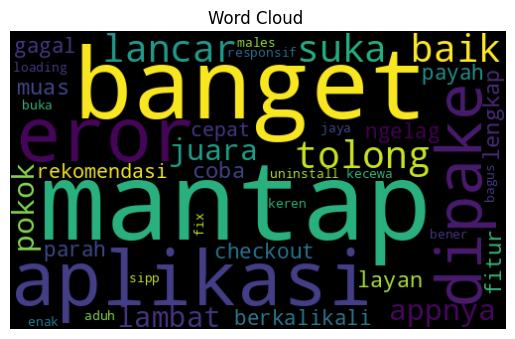

In [ ]:
all_words2 = ' '.join([i for i in df2['feedback']])
wordcloud2 = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words2)

plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud ')
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf2 = tfidf_vectorizer.fit_transform(df2['feedback'])
X_tfidf2.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.70710678, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

In [ ]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf2, df2['Sentiment'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((16, 40), (4, 40))

In [ ]:
# menampilkan total dari netral, positif, dan negatif dari data train
y_train2.value_counts()

,count
Sentiment,
Positif,7
Netral,5
Negatif,4


In [ ]:
rf_model2 = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_model2.fit(X_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [ ]:
# evaluasi model
from sklearn.metrics import classification_report

y_pred_rf = rf_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       1.00      1.00      1.00         1
      Netral       1.00      1.00      1.00         2
     Positif       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

